In [7]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data_path = "processed_data/010_data.h5"

# Open the H5 file
with h5py.File(data_path, 'r') as f:
    # Print the keys (dataset names) in the file
    print("Datasets in the file:", list(f.keys()))
    
    # Iterate through each dataset
    for key in f.keys():
        dataset = f[key]
        print(f"\nDataset: {key}")
        print(f"Shape: {dataset.shape}")
        print(f"Dtype: {dataset.dtype}")
        
        

Datasets in the file: ['edges', 'images', 'semantic_maps']

Dataset: edges
Shape: (24, 256, 256)
Dtype: uint8

Dataset: images
Shape: (24, 256, 256)
Dtype: float32

Dataset: semantic_maps
Shape: (24, 256, 256)
Dtype: uint8


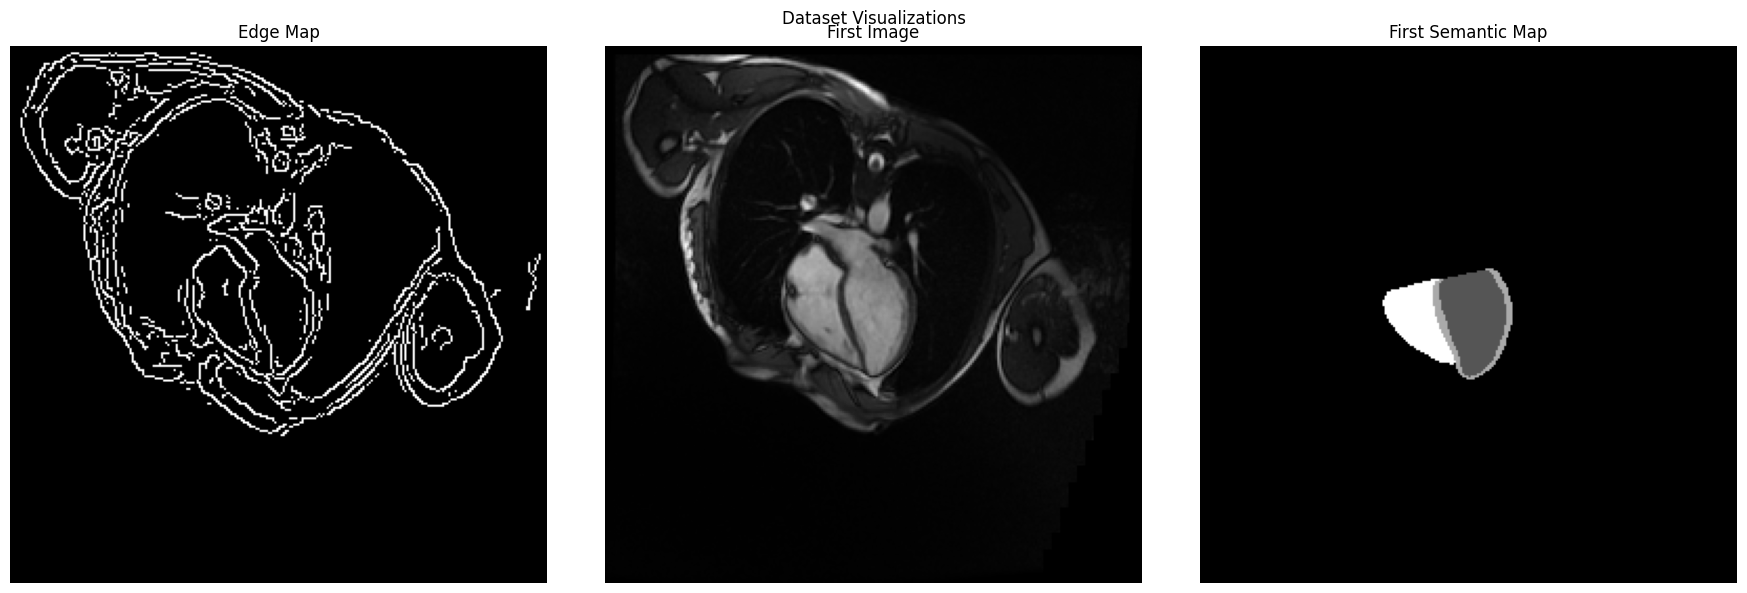

In [9]:
with h5py.File(data_path, 'r') as f:
    # Get the number of datasets
    num_datasets = len(f.keys())
    
    # Create a figure with subplots
    fig = plt.figure(figsize=(6*num_datasets, 6))
    fig.suptitle("Dataset Visualizations")
    
    # Iterate through each dataset
    for i, key in enumerate(f.keys(), 1):
        dataset = f[key]
        data = dataset[:]
        
        # Create a subplot for each dataset
        plt.subplot(1, num_datasets, i)
        
        # Plot specific visualizations based on the dataset
        if key == 'images':
            plt.imshow((data[0] + 1) * 127.5, cmap='gray')
            plt.title("First Image")
        elif key == 'semantic_maps':
            im = plt.imshow(data[0], cmap='gray')
            plt.title("First Semantic Map")
            # plt.colorbar(im, label='Class')
        elif key == 'edges':
            plt.imshow(data[0] * 255, cmap='gray')
            plt.title("Edge Map")
        
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()